In [1]:
import benchmark as bm
print(bm.__file__)

c:\Users\paula\Downloads\computer-vision-data-loader-main\computer-vision-data-loader-main\benchmark.py


In [2]:
import asyncio_ as ays
import benchmark as bm

csv_files = bm.get_csv_files(bm.CSV_FOLDER)
res = ays.main(bm.OUTPUT_FOLDER, csv_files)
print("Resultado Asyncio:", res)


Resultado Asyncio: {'method': 'Asyncio', 'duration': 0.07197117805480957, 'cpu_percent': 7.8}


In [3]:
print("CSV_FOLDER:", bm.CSV_FOLDER)
print("OUTPUT_FOLDER:", bm.OUTPUT_FOLDER)

csv_files = bm.get_csv_files(bm.CSV_FOLDER)
print("Archivos CSV encontrados:", csv_files)

res = bm.runners(bm.OUTPUT_FOLDER, csv_files)
print("Resultados crudos:", res)



CSV_FOLDER: C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data
OUTPUT_FOLDER: output
Archivos CSV encontrados: ['C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen1-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen2-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen3-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen4-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen5-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen6-data.csv']
Resultados crudos: [{'method': 'Multiprocessing', 'duration': 0.6684563159942627, 'cpu_percent': 12.1, 'status': 'ok'}, {'method': 'Threading', 'duration': 0.07369375228881836, 'cpu

In [4]:
import analytics as an

df_metrics = an.collect_metrics()
print(df_metrics)



            method  duration  cpu_percent status
0  Multiprocessing  0.598734         12.7     ok
1        Threading  0.095182         12.1     ok
2          Asyncio  0.049905         13.1     ok


C:\Users\paula\AppData\Local\Temp\ipykernel_4068\3918577267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metrics, x="method", y="duration", palette="Blues_d")


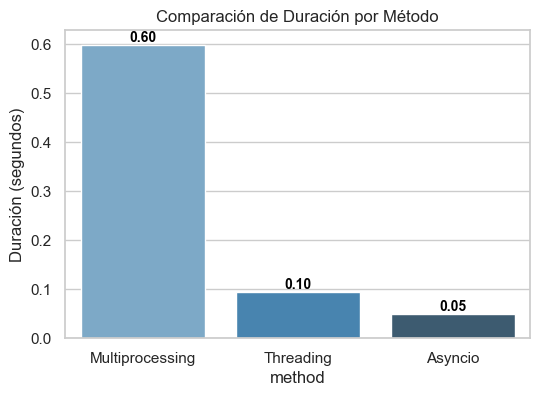

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_metrics, x="method", y="duration", palette="Blues_d")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color="black", weight="bold")

plt.ylabel("Duración (segundos)")
plt.title("Comparación de Duración por Método")
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_4068\3339396604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metrics, x="method", y="cpu_percent", palette="Oranges_d")


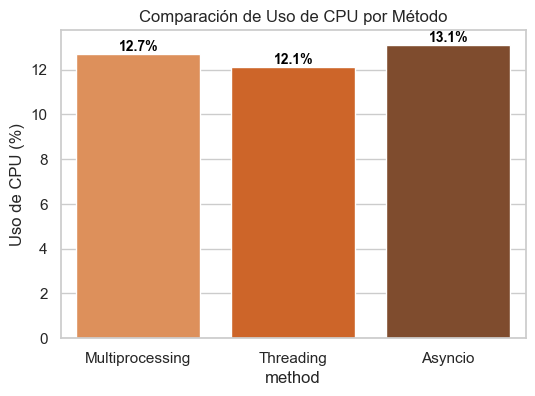

In [13]:
# Uso de CPU
plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_metrics, x="method", y="cpu_percent", palette="Oranges_d")

# Añadir etiquetas
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color="black", weight="bold")

plt.ylabel("Uso de CPU (%)")
plt.title("Comparación de Uso de CPU por Método")
plt.show()

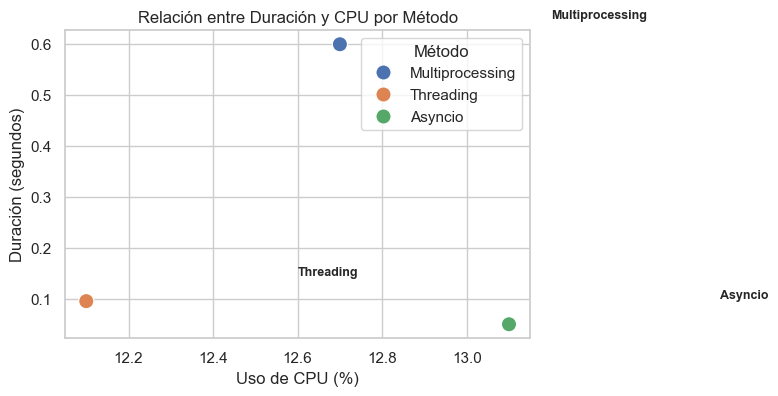

In [14]:
# Relación Duración vs CPU
plt.figure(figsize=(6,4))
ax = sns.scatterplot(data=df_metrics, x="cpu_percent", y="duration", hue="method", s=120)

# Añadir etiquetas a cada punto
for i, row in df_metrics.iterrows():
    ax.text(row["cpu_percent"]+0.5, row["duration"]+0.05, row["method"],
            fontsize=9, weight="bold")

plt.xlabel("Uso de CPU (%)")
plt.ylabel("Duración (segundos)")
plt.title("Relación entre Duración y CPU por Método")
plt.legend(title="Método")
plt.show()

In [17]:
# Obtener las métricas
df_metrics = an.collect_metrics()
print("Métricas originales:\n", df_metrics, "\n")

# Normalización
df_norm = df_metrics.copy()
df_norm["duration_norm"] = df_norm["duration"] / df_norm["duration"].min()
df_norm["cpu_norm"] = df_norm["cpu_percent"] / df_norm["cpu_percent"].max()

print("Métricas normalizadas:\n", df_norm)

Métricas originales:
             method    duration  cpu_percent status
0  Multiprocessing  251.593591         44.4     ok
1        Threading    0.154799         32.4     ok
2          Asyncio    0.213675         26.4     ok 

Métricas normalizadas:
             method    duration  cpu_percent status  duration_norm  cpu_norm
0  Multiprocessing  251.593591         44.4     ok    1625.289754  1.000000
1        Threading    0.154799         32.4     ok       1.000000  0.729730
2          Asyncio    0.213675         26.4     ok       1.380335  0.594595


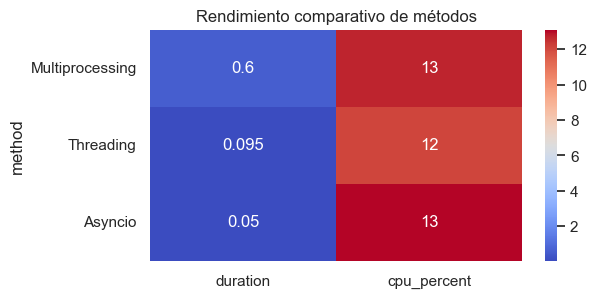

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.heatmap(df_metrics.set_index("method")[["duration","cpu_percent"]], annot=True, cmap="coolwarm")
plt.title("Rendimiento comparativo de métodos")
plt.show()

## Conclusiones:

1. Multiprocessing es el enfoque con peores metricas de los 3, aun cuando utiliza más CPU, tarda muchísimo mas tiempo que los otros enfoques. Esto confirma que no es la estrategia adecuada para tareas I/O-bound como descargas de red.

2. Threading es el más eficiente en tiempo, logra la menor duración absoluta, a costa de un consumo de CPU moderado.

3. Asyncio es el más eficiente en CPU, aunque tarda un poco más que Threading, reduce significativamente la carga en CPU. Esto lo hace ideal si se prioriza la escalabilidad (muchas conexiones concurrentes sin saturar recursos).

Recomendaciones:

Si la necesidad es máxima velocidad, usar Threading. Si se busca escalar a miles de descargas con bajo consumo de CPU, usar Asyncio. Y nunca utilizar Multiprocessing en cargas I/O-bound.